In [1]:
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('mortgage_dataset4.csv')

In [3]:
#3 months forecast
X=df.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y=df[['3monthForecast']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [5]:
#DT regression 3m
from sklearn.tree import DecisionTreeRegressor
treee=DecisionTreeRegressor()
treee.fit(X_train_scaled,y_train)
y_pred3m_DT=treee.predict(scaler.transform(X))
o=treee.fit(X_train_scaled,y_train)


In [6]:
df['y_pred3m_DT']=y_pred3m_DT

<Axes: title={'center': 'DT'}>

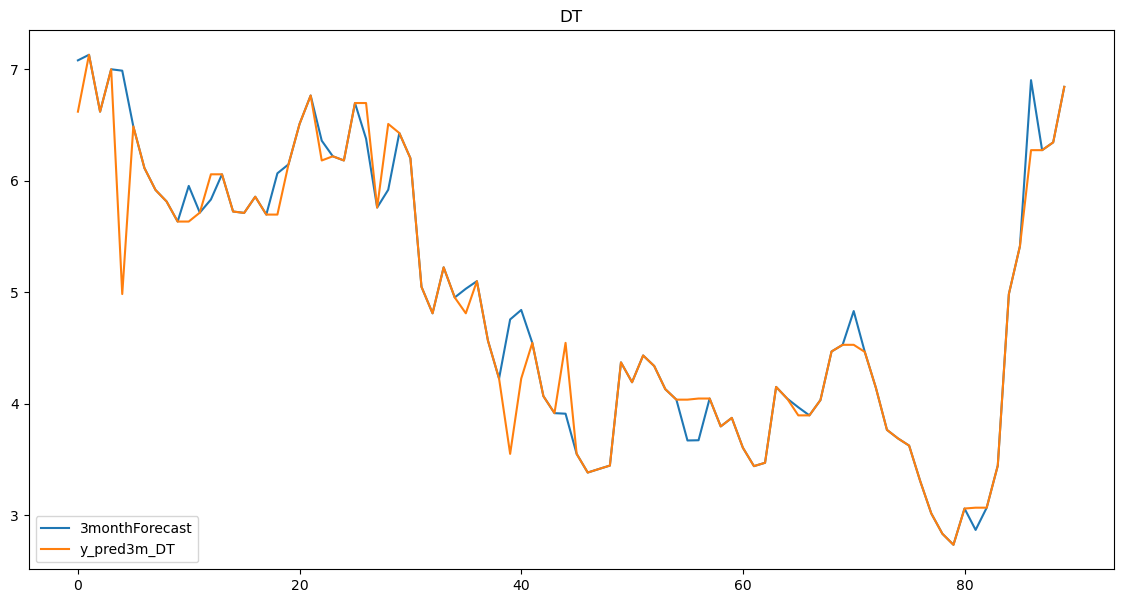

In [7]:
df[['3monthForecast',"y_pred3m_DT"]].plot(title='DT',figsize=(14, 7))

In [8]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(df['y_pred3m_DT'],df['3monthForecast'])

{'mape': 0.01902845529689535,
 'me': -0.040683333333333356,
 'mae': 0.1009166666666667,
 'mpe': -0.005201577789609884,
 'mse': 0.08977438611111115,
 'corr': 0.9704609331364473,
 'minmax': 0.018377808870250867}

In [9]:
df2=pd.read_csv('mortgage_dataset4.csv')
X=df2.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y=df2[['6monthForecast']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)
#DT regression 6m
tree=DecisionTreeRegressor()
tree.fit(X_train_scaled,y_train)
y_pred6m_DT=tree.predict(scaler.transform(X))

<Axes: title={'center': 'DT'}>

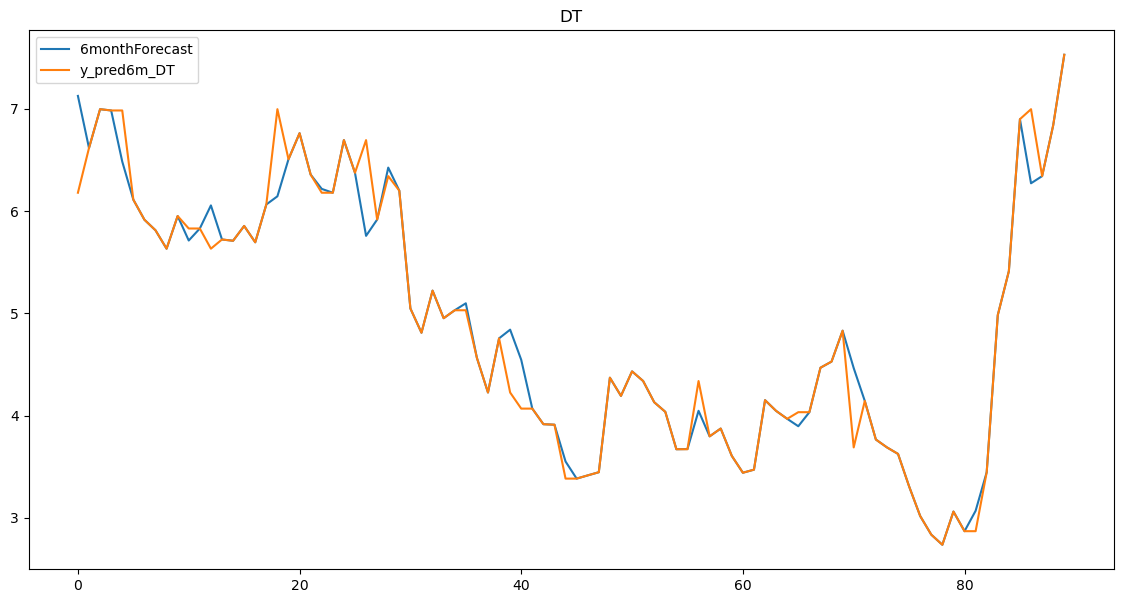

In [10]:
df2['y_pred6m_DT']=y_pred6m_DT
df2[['6monthForecast',"y_pred6m_DT"]].plot(title='DT',figsize=(14, 7))

In [11]:
forecast_accuracy(df2['y_pred6m_DT'],df2['6monthForecast'])

{'mape': 0.015289104538346828,
 'me': -0.0026277777777777966,
 'mae': 0.08176111111111112,
 'mpe': -0.0014654878163364317,
 'mse': 0.05404904166666669,
 'corr': 0.9833573659428181,
 'minmax': 0.014582093367273896}

In [12]:
#12 months forecast
df3=pd.read_csv('mortgage_dataset4.csv')
df3.drop(df3.tail(2).index,
        inplace = True)
X=df3.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y=df3[['12monthForecast']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)
#DT regression 6m
tree=DecisionTreeRegressor()
tree.fit(X_train_scaled,y_train)
y_pred12m_DT=tree.predict(scaler.transform(X))

<Axes: title={'center': 'DT'}>

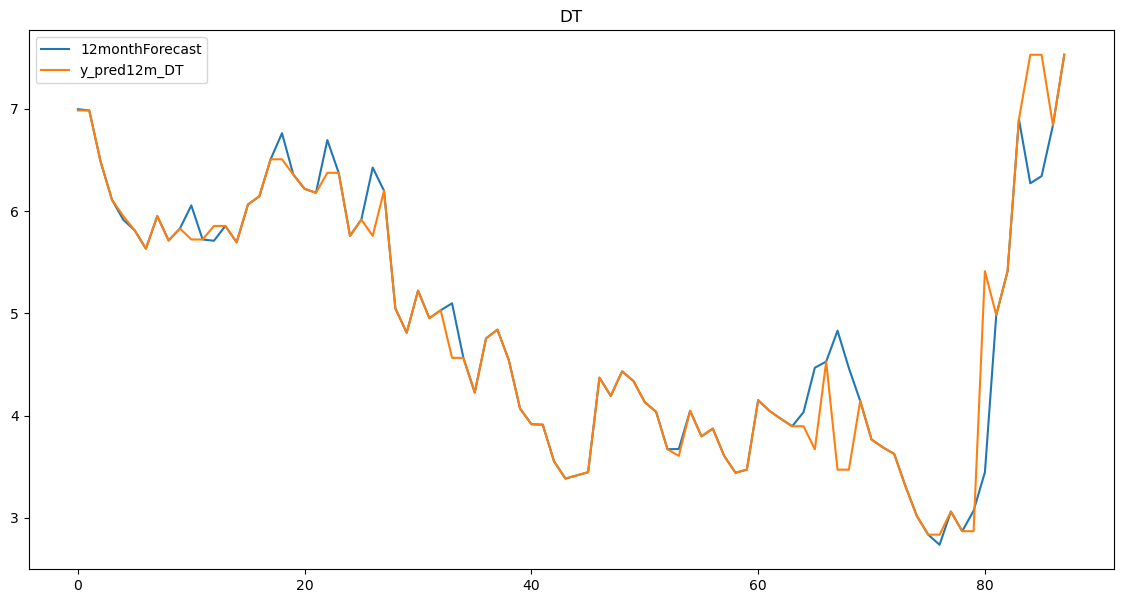

In [13]:
df3['y_pred12m_DT']=y_pred12m_DT
df3[['12monthForecast',"y_pred12m_DT"]].plot(title='DT',figsize=(14, 7))

In [14]:
forecast_accuracy(df3['y_pred12m_DT'],df3['12monthForecast'])

{'mape': 0.024746565177016712,
 'me': -0.011204545454545457,
 'mae': 0.11785227272727274,
 'mpe': -0.0014169849647097865,
 'mse': 0.13001888636363637,
 'corr': 0.9584755597078983,
 'minmax': 0.02164948063747152}

Text(0.5, 1.0, 'Actual vs Predicted 12M')

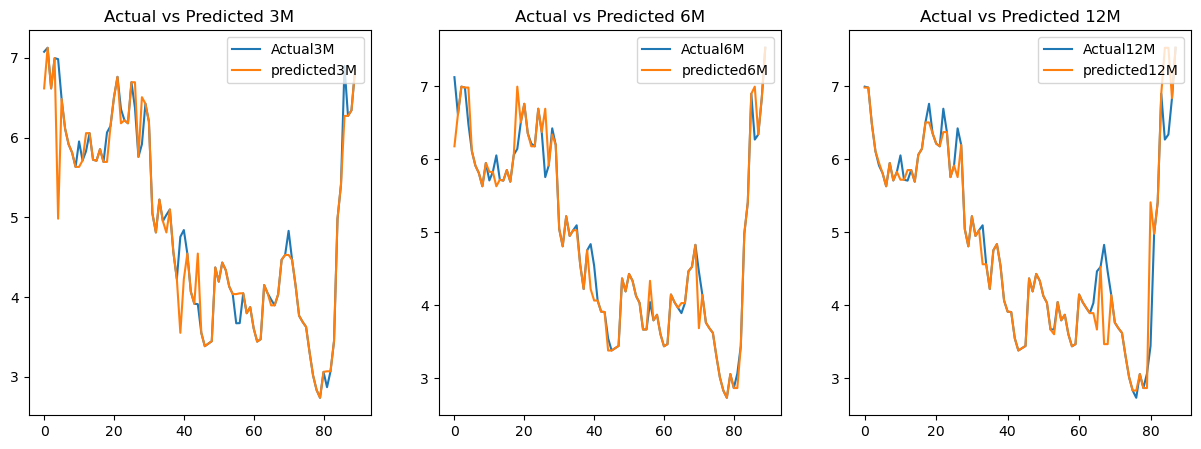

In [16]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
line1, = ax1.plot(df['3monthForecast'], label="Actual3M")
line2, = ax1.plot(df['y_pred3m_DT'], label="predicted3M")
ax1.legend(handles=[line1,line2], loc='upper right')
ax1.set_title('Actual vs Predicted 3M')

line3, = ax2.plot(df2['6monthForecast'], label="Actual6M")
line4, = ax2.plot(df2['y_pred6m_DT'], label="predicted6M")
ax2.legend(handles=[line3,line4], loc='upper right')
ax2.set_title('Actual vs Predicted 6M')

line5, = ax3.plot(df3['12monthForecast'], label="Actual12M")
line6, = ax3.plot(df3['y_pred12m_DT'], label="predicted12M")
ax3.legend(handles=[line5,line6], loc='upper right')
ax3.set_title('Actual vs Predicted 12M')